<a href="https://colab.research.google.com/github/gharashim/DL/blob/main/02_Machine_Learning_Basic_EX_07_Logistic_Regression_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

>### [예제 7] Logistic Regression (TensorFlow)

>### Load modules

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

if tf.__version__ >= '2.17.0':
    from tf_keras import optimizers
else:
    from tensorflow.keras import optimizers

print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

NumPy Version :1.26.4
TensorFlow Version :2.17.0
Matplotlib Version :3.7.1


> ### Input and Label

In [ ]:
# Logistic regression : Binary Classification data
x_input = tf.constant([[1, 1], [2, 1], [1, 2], [0.5, 4], [4, 1], [2.5, 2.3]], dtype= tf.float32)
labels = tf.constant([[0], [0], [0], [1], [1], [1]], dtype= tf.float32)

W = tf.Variable(tf.random.normal((2, 1)), dtype=tf.float32)
B = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

>### Activation Function : Sigmoid Function
>$\sigma(x) = \frac{1}{1+e^{-x}}$
>### Hypothesis : Logistic Equation
>### $H(x) = \sigma(XW + b$)

In [ ]:
def Hypothesis(x):
  return tf.sigmoid(tf.add(tf.matmul(x ,W), B))

>### Cost Function : Cross Entropy Error
>### $cost(W,b) = \frac{1}{m}\sum_{i=1}^{m}t\log{H(x_{i}})+(1-t)\log{(1-H(x_{i}}))$

In [ ]:
def Cost():
  return -tf.reduce_mean(labels * tf.math.log(Hypothesis(x_input)) + (1 - labels) * tf.math.log(1 - Hypothesis(x_input)))

### 학습 (Training)

In [ ]:
%%time
epochs = 10000
learning_rate = 0.1
optimizer = optimizers.SGD(learning_rate=learning_rate)

training_idx = np.arange(0, epochs+1, 1)
cost_graph = np.zeros(epochs+1)
check = np.array([0, epochs*0.01, epochs*0.08, epochs*0.2, epochs*0.4, epochs])

W_trained = []
b_trained = []
check_idx = 0

# 학습 (Training)
for cnt in range(0, epochs+1):
  cost_graph[cnt] = Cost()
  if cnt % (epochs//20) == 0:
    print("[{:>5}] cost = {:>10.4}, W = [[{:>7.4}] [{:>7.4}]], B = [[{:>7.4}]]".format(cnt, cost_graph[cnt], W[0,0], W[1,0], B[0]))
  if check[check_idx] == cnt:
    W_trained.append(W.numpy())
    b_trained.append(B.numpy())
    check_idx += 1

  optimizer.minimize(Cost,[W, B])

[    0] cost =      1.786, W = [[-0.3961] [ -1.318]], B = [[ 0.8521]]
[  500] cost =     0.3206, W = [[ 0.9145] [  1.075]], B = [[ -3.405]]
[ 1000] cost =     0.1919, W = [[  1.481] [  1.716]], B = [[ -5.764]]
[ 1500] cost =     0.1366, W = [[  1.854] [  2.139]], B = [[  -7.32]]
[ 2000] cost =      0.106, W = [[  2.133] [  2.454]], B = [[ -8.482]]
[ 2500] cost =    0.08643, W = [[  2.355] [  2.706]], B = [[ -9.409]]
[ 3000] cost =    0.07293, W = [[  2.541] [  2.916]], B = [[ -10.18]]
[ 3500] cost =    0.06305, W = [[  2.699] [  3.095]], B = [[ -10.84]]
[ 4000] cost =     0.0555, W = [[  2.837] [  3.252]], B = [[ -11.42]]
[ 4500] cost =    0.04955, W = [[   2.96] [  3.392]], B = [[ -11.93]]
[ 5000] cost =    0.04475, W = [[  3.071] [  3.517]], B = [[ -12.39]]
[ 5500] cost =    0.04079, W = [[  3.171] [  3.631]], B = [[ -12.81]]
[ 6000] cost =    0.03746, W = [[  3.263] [  3.735]], B = [[ -13.19]]
[ 6500] cost =    0.03464, W = [[  3.348] [  3.831]], B = [[ -13.55]]
[ 7000] cost =    0.

>### Hypothesis Test

In [ ]:
# Training 결과 Test 및 Prediction

print("[Training Test]")
H_x = Hypothesis(x_input).numpy()
H_x = H_x.reshape((-1,))
H = [int(h>0.5) for h in H_x]
for idx in range(x_input.shape[0]):
    print("Input {} , Label : {} => H :{:>2}(H_x:{:>5.2})".format(x_input[idx], labels[idx], H[idx], H_x[idx]))

[Training Test]
Input [1. 1.] , Label : [0.] => H : 0(H_x:0.00068)
Input [2. 1.] , Label : [0.] => H : 0(H_x: 0.03)
Input [1. 2.] , Label : [0.] => H : 0(H_x: 0.05)
Input [0.5 4. ] , Label : [1.] => H : 1(H_x: 0.98)
Input [4. 1.] , Label : [1.] => H : 1(H_x: 0.98)
Input [2.5 2.3] , Label : [1.] => H : 1(H_x: 0.98)


In [ ]:
print("\n[ Prediction by specific data ]")
x_test = tf.constant([[1.5, 3], [0.5, 2]], dtype= tf.float32)
H_x = Hypothesis(x_test).numpy().reshape((-1,))
for idx in range(x_test.shape[0]):
  print("Input {} => H_x: {:>5.2}".format(x_test[idx], H_x[idx]))


[ Prediction by specific data ]
Input [1.5 3. ] => H_x:  0.96
Input [0.5 2. ] => H_x: 0.0078


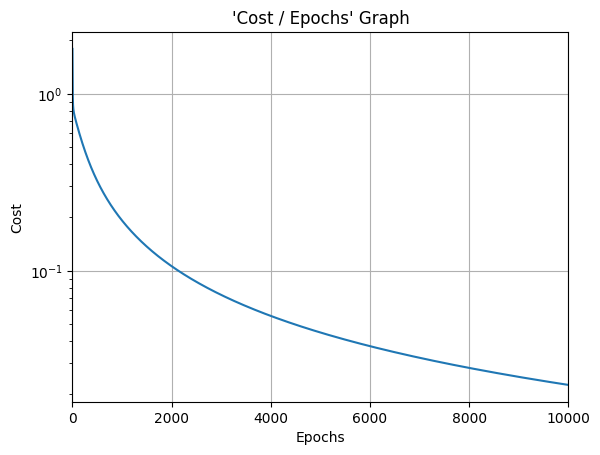

In [ ]:
# Training 상황에 대한 그래프 출력
# Training 회수 별 Cost 값
plt.title("'Cost / Epochs' Graph")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.plot(training_idx, cost_graph)
plt.xlim(0, epochs)
plt.grid(True)
plt.semilogy()
plt.show()

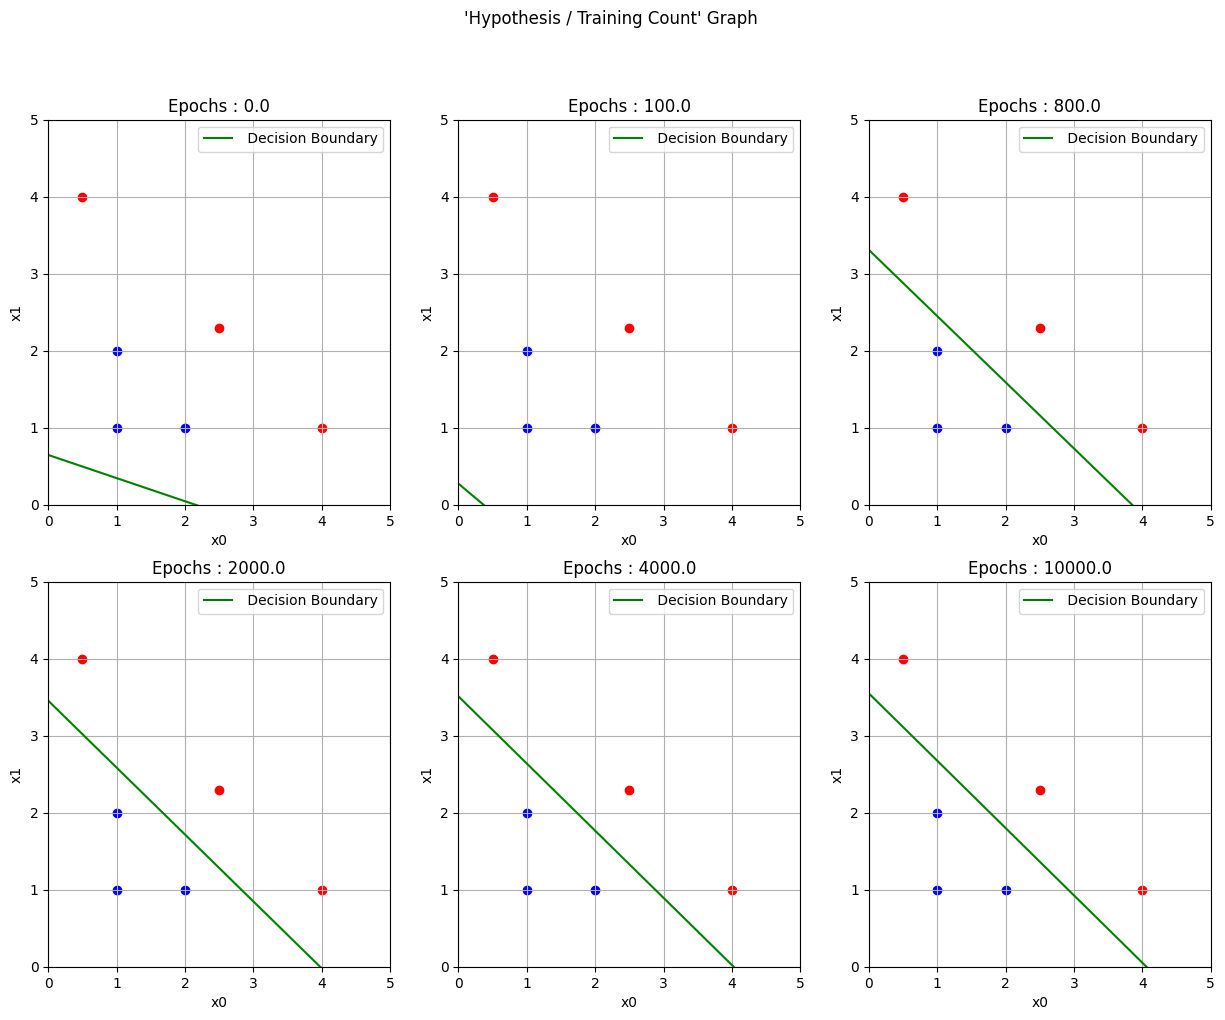

In [ ]:
# 구분선 그리기
x_decision = np.linspace(0, 5, 1000)

fig, axes = plt.subplots(2, 3, figsize=(15, 11))
fig.suptitle("'Hypothesis / Training Count' Graph")

for ax_idx in range(check.size):
    W = W_trained[ax_idx]
    B = b_trained[ax_idx]
    y_decision = -(W[0] * x_decision + B[0])/W[1]

    ax =  axes[ax_idx // 3][ax_idx % 3]

    #   label의 값에 따라서 blue 또는 red 점 찍기
    for i in range(labels.shape[0]):
        if(labels[i][0] == 0):
            ax.scatter(x_input[i][0], x_input[i][1], color='blue')
        else:
            ax.scatter(x_input[i][0], x_input[i][1], color='red')

    ax.plot(x_decision, y_decision, label=' Decision Boundary', color='green')

    ax.set_title("Epochs : {}".format(check[ax_idx]))
    ax.set_xlim((0, 5))
    ax.set_ylim((0, 5))
    ax.set_xlabel("x0")
    ax.set_ylabel("x1")
    ax.grid(True)
    ax.legend()

plt.show()